# Ecommerce Sales of Video Games
Video game is always related to our childhood. We played game when we're small and
even when we'realready an adult. But is the industry doing well these day ? We can 
analyze the video game sale datasetwith graphs visualization to get some insight about 
that.

&#9888; The Data Set is Taken from: [https://www.kaggle.com/datasets/rishidamarla/video-game-sales](https://www.kaggle.com/datasets/rishidamarla/video-game-sales)

### Installing Spark SQL Dependencies and Reading Data

In [0]:
!pip install pyspark
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("Travel Data Analysis using Pyspark").getOrCreate()
df=spark.read.format("csv").option("delimeter",",").option("inferSchema","true").option("header","true").load("/FileStore/tables/Video_Games.csv")
df.show()

     |▍    

*** WARNING: max output size exceeded, skipping output. ***

     |████████████████████████████████| 317.0 MB 11 kB/s 
     |████████████████████████████████| 200 kB 15.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488511 sha256=7643077a16888bb820c1ee31411477c8f3fcff55d6edda1b114e72eba935948f
  Stored in directory: /root/.cache/pip/wheels/92/09/11/aa01d01a7f005fda8a66ad71d2be7f8aa341bddafb27eee3c7
Successfully built pyspark
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-c6ae406a-5e09-4477-9b72-c94dff3d430e/bin/python -m pip install --upgrade pip' command.
+--------------------+--------+---------------+------------+--------------------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+-------------------+------+
|                Name|Platform|Year_of_Release|       Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|Criti

### Importing Libraries for Visualisation.

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style("darkgrid")
palette_color=sns.color_palette("crest")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

### Converting Dataframe to Temporary View for Spark SQL Analysis

In [0]:
df = df.repartition("column_to_partition")
df.createOrReplaceGlobalTempView("sales")
result=spark.sql("SELECT * FROM global_temp.sales limit 10");
result.show()

+--------------------+--------+---------------+------------+---------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+---------+------+
|                Name|Platform|Year_of_Release|       Genre|Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|Critic_Score|Critic_Count|User_Score|User_Count|Developer|Rating|
+--------------------+--------+---------------+------------+---------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+---------+------+
|          Wii Sports|     Wii|           2006|      Sports| Nintendo|   41.36|   28.96|    3.77|       8.45|       82.53|          76|          51|         8|       322| Nintendo|     E|
|   Super Mario Bros.|     NES|           1985|    Platform| Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|        null|        null|      null|      null|     null|  null|
|      Mario Kart Wii|     Wii|           2008|      Racing|

### Exploratory Data Analysis & Visualization

1) First, We should see the total sales of games each year. It helps us to know when video games are
declining and when they are popular.

In [0]:
result=spark.sql("SELECT Year_of_Release, (sum(NA_Sales)+sum(EU_Sales)+sum(JP_Sales)+sum(Other_Sales)+sum(Global_Sales)) as Total_Sales FROM global_temp.sales group by Year_of_Release order by Year_of_Release");
result.show()

+---------------+------------------+
|Year_of_Release|       Total_Sales|
+---------------+------------------+
|           1980|             22.76|
|           1981| 71.45000000000002|
|           1982|             57.74|
|           1983|             33.59|
|           1984|100.71000000000001|
|           1985|107.89000000000001|
|           1986|             74.15|
|           1987|             43.44|
|           1988|             94.43|
|           1989|             146.9|
|           1990| 98.75999999999999|
|           1991| 64.46000000000001|
|           1992|152.32999999999998|
|           1993|             96.81|
|           1994|158.41000000000003|
|           1995| 176.2299999999999|
|           1996|398.29999999999984|
|           1997| 402.0500000000001|
|           1998| 512.7599999999998|
|           1999|502.36000000000024|
+---------------+------------------+
only showing top 20 rows



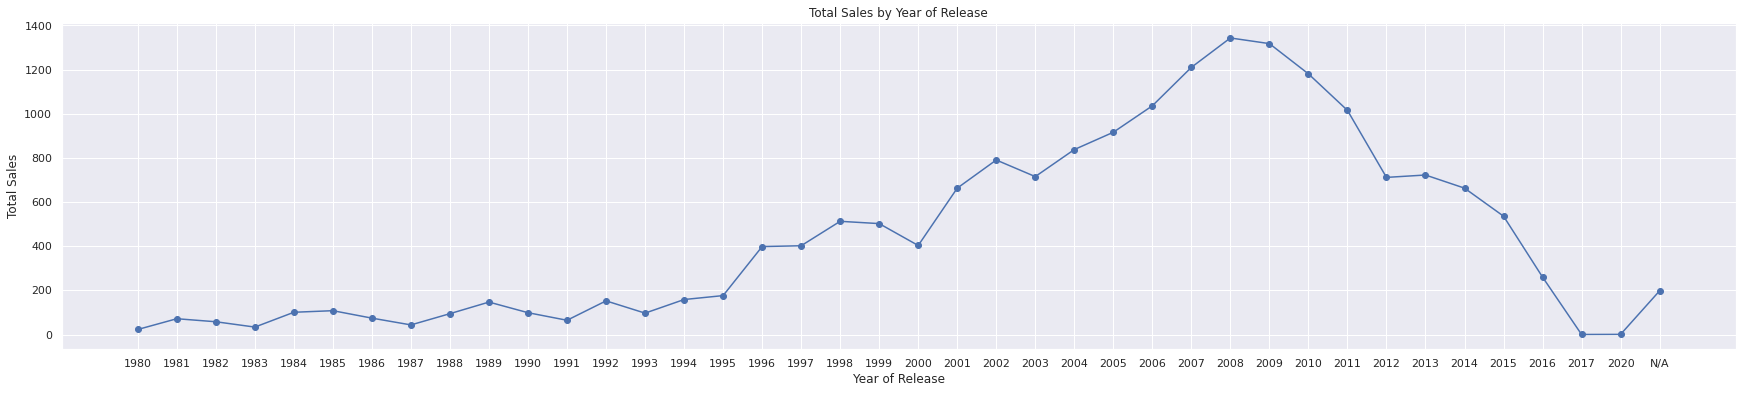

In [0]:
# Converting the PySpark Dataframe to Pandas Dataframe
result_df = result.toPandas()

# Data Plotting using Matplotlib
plt.figure(figsize=(30, 6)) # Width and Height of the Graph
plt.plot(result_df['Year_of_Release'], result_df['Total_Sales'], marker='o') # X-axis, Y-axis and Marker Indicator for the graph

# Labelling the Graph
plt.title('Total Sales by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.grid(True)

# Showing the Graph
plt.show()

2) Total Sales Comparision Between Region Area

In [0]:
result=spark.sql("SELECT Year_of_Release, sum(NA_Sales) as Sales_NorthAmerica,sum(EU_Sales) as Sales_Europe,sum(JP_Sales) as Sales_Japan FROM global_temp.sales group by Year_of_Release order by Year_of_Release");
result.show()

+---------------+------------------+------------------+------------------+
|Year_of_Release|Sales_NorthAmerica|      Sales_Europe|       Sales_Japan|
+---------------+------------------+------------------+------------------+
|           1980|10.590000000000003|0.6700000000000002|               0.0|
|           1981|              33.4|1.9600000000000006|               0.0|
|           1982|26.920000000000005|1.6500000000000008|               0.0|
|           1983|              7.76|0.8000000000000003|               8.1|
|           1984|             33.28|2.0999999999999996|14.269999999999998|
|           1985|             33.73|              4.74|             14.56|
|           1986|              12.5|2.8400000000000007|             19.81|
|           1987| 8.460000000000003|1.4100000000000001|             11.63|
|           1988|23.869999999999997| 6.590000000000001|15.759999999999998|
|           1989|             45.15|              8.44|18.360000000000003|
|           1990|        

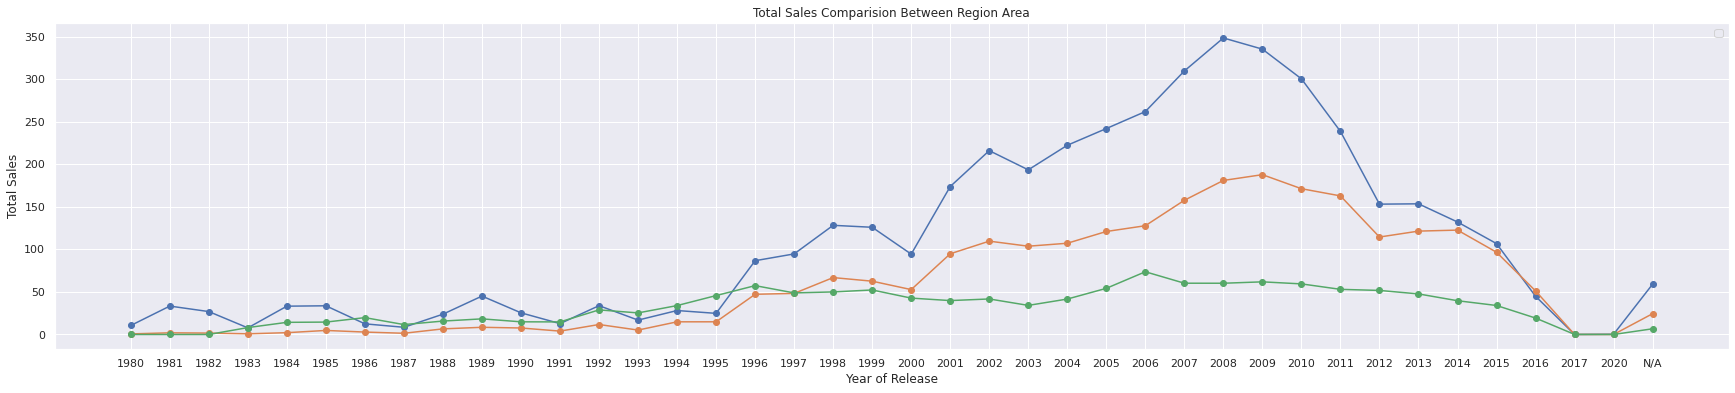

In [0]:
# Converting the PySpark Dataframe to Pandas Dataframe
result_df = result.toPandas()

# Data Plotting using Matplotlib
plt.figure(figsize=(30, 6)) # Width and Height of the Graph
plt.plot(result_df['Year_of_Release'], result_df['Sales_NorthAmerica'], marker='o') # X-axis, Y-axis and Marker Indicator for the graph
plt.plot(result_df['Year_of_Release'], result_df['Sales_Europe'], marker='o') # X-axis, Y-axis and Marker Indicator for the graph
plt.plot(result_df['Year_of_Release'], result_df['Sales_Japan'], marker='o') # X-axis, Y-axis and Marker Indicator for the graph

# Labelling the Graph
plt.title('Total Sales Comparision Between Region Area')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend() # Adding legend to show which line corresponds to which region
plt.grid(True)

# Showing the Graph
plt.show()

3) Top 10 Games and Platform in 2008 and 2009

In [0]:
result=spark.sql("SELECT Name as Games, (sum(NA_Sales)+sum(EU_Sales)+sum(JP_Sales)+sum(Other_Sales)+sum(Global_Sales)) as Total_Sales FROM global_temp.sales where Year_of_Release>=2008 and Year_of_Release<=2009 GROUP BY Name order by Total_Sales desc limit 10");
result.show()

+--------------------+------------------+
|               Games|       Total_Sales|
+--------------------+------------------+
|      Mario Kart Wii| 71.03999999999999|
|   Wii Sports Resort|             65.54|
|New Super Mario B...|             56.64|
|Call of Duty: Mod...|             49.92|
| Grand Theft Auto IV| 44.75999999999999|
|        Wii Fit Plus|             43.59|
|Call of Duty: Wor...|             31.56|
|Super Smash Bros....|             25.68|
|Pokemon HeartGold...|             23.54|
| Assassin's Creed II|21.599999999999998|
+--------------------+------------------+



In [0]:
result=spark.sql("SELECT Platform, (sum(NA_Sales)+sum(EU_Sales)+sum(JP_Sales)+sum(Other_Sales)+sum(Global_Sales)) as Total_Sales FROM global_temp.sales where Year_of_Release>=2008 and Year_of_Release<=2009 GROUP BY Platform order by Total_Sales desc limit 10");
result.show()

+--------+------------------+
|Platform|       Total_Sales|
+--------+------------------+
|     Wii| 756.8200000000006|
|      DS| 529.7599999999992|
|    X360| 511.0800000000006|
|     PS3|498.81999999999994|
|     PS2|160.58000000000018|
|     PSP|            144.63|
|      PC| 58.86000000000007|
|      XB|              0.36|
|      DC|              0.08|
+--------+------------------+



4) in 2008 and 2009, the most popular games was from wii platform. Tht's pretty interesting let see the
pie grapgh for platfrom (We should combine two dataframe as well)

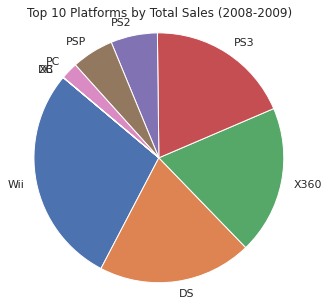

In [0]:
# Convert PySpark DataFrame to Pandas DataFrame
result_df = result.toPandas()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(result_df['Total_Sales'], labels=result_df['Platform'], startangle=140)
plt.title('Top 10 Platforms by Total Sales (2008-2009)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

5) Top 10 Platform Overall

In [0]:
result=spark.sql("SELECT Platform, (sum(NA_Sales)+sum(EU_Sales)+sum(JP_Sales)+sum(Other_Sales)+sum(Global_Sales)) as Total_Sales FROM global_temp.sales GROUP BY Platform order by Total_Sales desc limit 10");
result.show()

+--------+------------------+
|Platform|       Total_Sales|
+--------+------------------+
|     PS2|2511.4099999999767|
|    X360|1943.0499999999965|
|     PS3| 1879.079999999995|
|     Wii|1815.6399999999971|
|      DS|1613.5099999999843|
|      PS|1461.5399999999956|
|     GBA| 636.3499999999989|
|     PS4| 628.4099999999994|
|     PSP| 588.3499999999954|
|      PC| 519.8199999999972|
+--------+------------------+



6) Top 10 Publishers

In [0]:
result=spark.sql("SELECT Publisher, (sum(NA_Sales)+sum(EU_Sales)+sum(JP_Sales)+sum(Other_Sales)+sum(Global_Sales)) as Total_Sales FROM global_temp.sales GROUP BY Publisher order by Total_Sales desc limit 10");
result.show()

+--------------------+------------------+
|           Publisher|       Total_Sales|
+--------------------+------------------+
|            Nintendo| 3577.619999999997|
|     Electronic Arts|2233.6799999999844|
|          Activision|1462.1699999999994|
|Sony Computer Ent...|1213.0299999999988|
|             Ubisoft| 943.0399999999995|
|Take-Two Interactive| 807.6600000000001|
|                 THQ| 676.8399999999996|
|Konami Digital En...| 564.5999999999985|
|                Sega| 540.4899999999993|
|  Namco Bandai Games| 509.1300000000009|
+--------------------+------------------+



7) Top Genre

In [0]:
result=spark.sql("SELECT Genre, (sum(NA_Sales)+sum(EU_Sales)+sum(JP_Sales)+sum(Other_Sales)+sum(Global_Sales)) as Total_Sales FROM global_temp.sales GROUP BY Genre order by Total_Sales desc limit 10");
result.show()

+------------+------------------+
|       Genre|       Total_Sales|
+------------+------------------+
|      Action|3489.4499999999434|
|      Sports|2663.2699999999763|
|     Shooter| 2105.389999999969|
|Role-Playing|1869.0099999999907|
|    Platform| 1655.849999999996|
|        Misc| 1605.689999999995|
|      Racing|1457.5699999999938|
|    Fighting| 895.0099999999996|
|  Simulation| 780.6799999999987|
|      Puzzle| 485.5900000000006|
+------------+------------------+



8) We should use pie chart for this kind of things. Since it can give you the percent of each genre as well.

+--------+------------------+
|Platform|       Total_Sales|
+--------+------------------+
|     PS2|2511.4099999999767|
|    X360|1943.0499999999965|
|     PS3| 1879.079999999995|
|     Wii|1815.6399999999971|
|      DS|1613.5099999999843|
|      PS|1461.5399999999956|
|     GBA| 636.3499999999989|
|     PS4| 628.4099999999994|
|     PSP| 588.3499999999954|
|      PC| 519.8199999999972|
+--------+------------------+



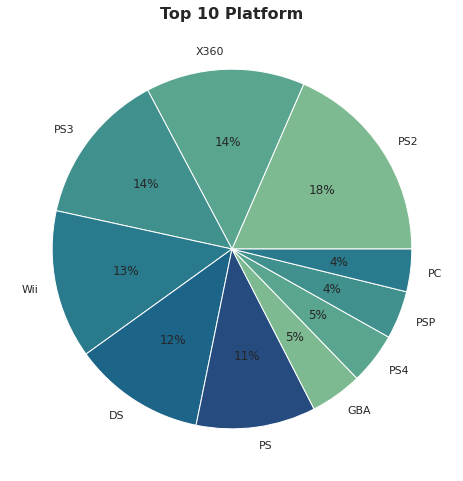

In [0]:
# Scenario 5:
result5=spark.sql("SELECT Platform, (sum(NA_Sales)+sum(EU_Sales)+sum(JP_Sales)+sum(Other_Sales)+sum(Global_Sales)) as Total_Sales FROM global_temp.sales GROUP BY Platform order by Total_Sales desc limit 10");
result5.show()
df5=result5.toPandas()
plt.pie(df5.Total_Sales, labels=df5.Platform, colors=palette_color, autopct='%.0f%%') 
plt.title('Top 10 Platform', fontsize=16, fontweight='bold')
plt.show()

+--------------------+------------------+
|           Publisher|       Total_Sales|
+--------------------+------------------+
|            Nintendo| 3577.619999999997|
|     Electronic Arts|2233.6799999999844|
|          Activision|1462.1699999999994|
|Sony Computer Ent...|1213.0299999999988|
|             Ubisoft| 943.0399999999995|
|Take-Two Interactive| 807.6600000000001|
|                 THQ| 676.8399999999996|
|Konami Digital En...| 564.5999999999985|
|                Sega| 540.4899999999993|
|  Namco Bandai Games| 509.1300000000009|
+--------------------+------------------+



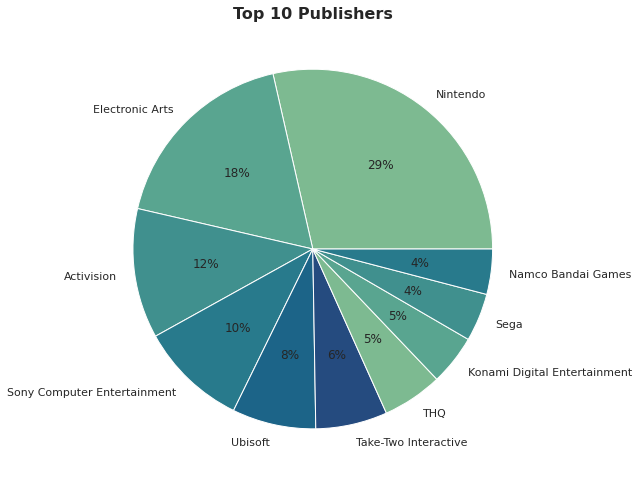

In [0]:
# Scenario 6:
result6=spark.sql("SELECT Publisher, (sum(NA_Sales)+sum(EU_Sales)+sum(JP_Sales)+sum(Other_Sales)+sum(Global_Sales)) as Total_Sales FROM global_temp.sales GROUP BY Publisher order by Total_Sales desc limit 10");
result6.show()
df6=result6.toPandas()
plt.pie(df6.Total_Sales, labels=df6.Publisher, colors=palette_color, autopct='%.0f%%') 
plt.title('Top 10 Publishers', fontsize=16, fontweight='bold')
plt.show()

+------------+------------------+
|       Genre|       Total_Sales|
+------------+------------------+
|      Action|3489.4499999999434|
|      Sports|2663.2699999999763|
|     Shooter| 2105.389999999969|
|Role-Playing|1869.0099999999907|
|    Platform| 1655.849999999996|
|        Misc| 1605.689999999995|
|      Racing|1457.5699999999938|
|    Fighting| 895.0099999999996|
|  Simulation| 780.6799999999987|
|      Puzzle| 485.5900000000006|
+------------+------------------+



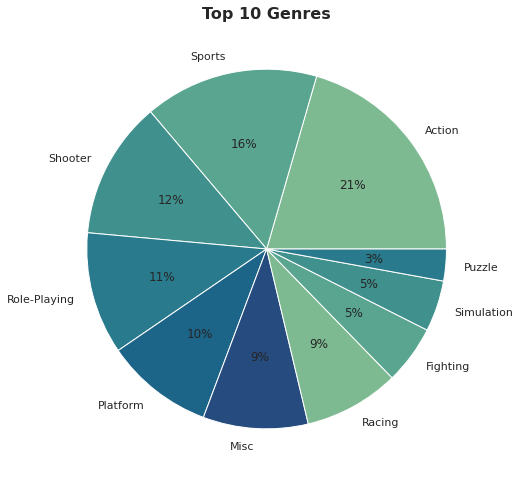

In [0]:
# Scenario 7:
result=spark.sql("SELECT Genre, (sum(NA_Sales)+sum(EU_Sales)+sum(JP_Sales)+sum(Other_Sales)+sum(Global_Sales)) as Total_Sales FROM global_temp.sales GROUP BY Genre order by Total_Sales desc limit 10");
result.show()
top10_gen=result.toPandas()
plt.pie(top10_gen.Total_Sales, labels=top10_gen.Genre, colors=palette_color, autopct='%.0f%%') 
plt.title('Top 10 Genres', fontsize=16, fontweight='bold')
plt.show()

9) How many games was sold in the US from 2000 to 2006
? How does it Compare to Global sale ?

In [0]:
result9=spark.sql("select sum(NA_Sales) as Total_USA_Sales,sum(Global_Sales) as Total_Global_Sales from global_temp.sales where Year_of_Release>=2000 AND Year_of_Release<=2006");
result9.show()

+------------------+------------------+
|   Total_USA_Sales|Total_Global_Sales|
+------------------+------------------+
|1405.0699999999345| 2681.940000000094|
+------------------+------------------+



10) Assume We want to join the game industry and target US
market. Which genre should we try to make ?

In [0]:
result10=spark.sql("select Genre,sum(NA_Sales) as USA_Sales from global_temp.sales group by Genre order by USA_Sales desc limit 3");

result10.show()

+-------+-----------------+
|  Genre|        USA_Sales|
+-------+-----------------+
| Action|879.0099999999902|
| Sports|684.4299999999976|
|Shooter| 592.239999999995|
+-------+-----------------+



11) Who is the top Publisher in Japan ? what game is the
bestseller and did they focus in some specific genre or Just
publish whatever they think will be popular ?


In [0]:
result11a=spark.sql("select Publisher,sum(JP_Sales) as Japan_Sales from global_temp.sales group by Publisher order by Japan_Sales desc limit 1");
result11a.show()

+---------+-----------------+
|Publisher|      Japan_Sales|
+---------+-----------------+
| Nintendo|458.1499999999996|
+---------+-----------------+



In [0]:
result11b=spark.sql("select Name,sum(JP_Sales) as Japan_Sales from global_temp.sales where Publisher='Nintendo' group by Name order by Japan_Sales desc limit 1");
result11b.show()

+--------------------+-----------+
|                Name|Japan_Sales|
+--------------------+-----------+
|Pokemon Red/Pokem...|      10.22|
+--------------------+-----------+



In [0]:
result11c=spark.sql("select Genre,sum(JP_Sales) as Japan_Sales from global_temp.sales where Publisher ='Nintendo' group by Genre order by Japan_Sales desc limit 5");
result11c.show()

+------------+------------------+
|       Genre|       Japan_Sales|
+------------+------------------+
|Role-Playing|104.61000000000008|
|    Platform|102.41000000000004|
|        Misc|55.350000000000016|
|      Puzzle| 37.08999999999998|
|      Sports| 35.89000000000001|
+------------+------------------+



12) Make a chart to display how the top trending game
(genre) in 2008 was doing upto 2015 and how the top trending
in 2015 was doing before 2008.

In [0]:
#top trending game in 2008
result12a=spark.sql("select Name,Genre,sum(Global_Sales) as Global_Sales from global_temp.sales where Year_of_Release=2008 group by Name,Genre order by Global_Sales desc limit 1");
result12a.show()

+--------------+------+------------+
|          Name| Genre|Global_Sales|
+--------------+------+------------+
|Mario Kart Wii|Racing|       35.52|
+--------------+------+------------+



In [0]:
#top trending game in 2015
result12b=spark.sql("select Name,Genre,sum(Global_Sales) as Global_Sales from global_temp.sales where Year_of_Release=2015 group by Name,Genre order by Global_Sales desc limit 1");
result12b.show()

+--------------------+-------+------------------+
|                Name|  Genre|      Global_Sales|
+--------------------+-------+------------------+
|Call of Duty: Bla...|Shooter|25.680000000000003|
+--------------------+-------+------------------+



In [0]:
result12c=spark.sql("select Genre,Year_of_Release,sum(Global_Sales) as Global_Sales from global_temp.sales where Genre='Racing' and Year_of_Release<=2015 and Year_of_Release>=2008 group by Genre,Year_of_Release order by Year_of_Release")
result12c.show()

+------+---------------+------------------+
| Genre|Year_of_Release|      Global_Sales|
+------+---------------+------------------+
|Racing|           2008| 70.02999999999997|
|Racing|           2009|             33.65|
|Racing|           2010| 34.36000000000001|
|Racing|           2011| 34.83000000000003|
|Racing|           2012|13.679999999999998|
|Racing|           2013|12.329999999999998|
|Racing|           2014|16.640000000000004|
|Racing|           2015| 8.069999999999997|
+------+---------------+------------------+



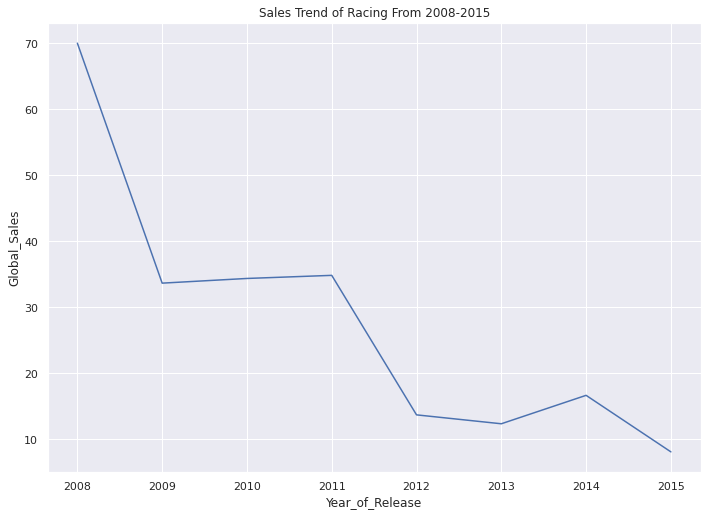

In [0]:
df12c=result12c.toPandas()
sns.lineplot(x='Year_of_Release', y='Global_Sales', data=df12c)
plt.title('Sales Trend of Racing From 2008-2015')
plt.xlabel('Year_of_Release')
plt.ylabel('Global_Sales')
plt.show()

In [0]:
result12d=spark.sql("select Genre,Year_of_Release,sum(Global_Sales) as Global_Sales from global_temp.sales where Genre='Shooter' and Year_of_Release<=2008 group by Genre,Year_of_Release order by Year_of_Release")
result12d.show()

+-------+---------------+-------------------+
|  Genre|Year_of_Release|       Global_Sales|
+-------+---------------+-------------------+
|Shooter|           1980|  7.069999999999999|
|Shooter|           1981| 10.040000000000001|
|Shooter|           1982|               3.79|
|Shooter|           1983|               0.48|
|Shooter|           1984| 31.099999999999998|
|Shooter|           1985|                1.0|
|Shooter|           1986|               3.89|
|Shooter|           1987|               0.71|
|Shooter|           1988|               0.51|
|Shooter|           1989|                1.2|
|Shooter|           1991|                2.0|
|Shooter|           1992|0.29000000000000004|
|Shooter|           1993|               3.08|
|Shooter|           1994|                8.3|
|Shooter|           1995| 4.1499999999999995|
|Shooter|           1996|               6.91|
|Shooter|           1997| 22.169999999999998|
|Shooter|           1998|  9.799999999999997|
|Shooter|           1999| 12.24999

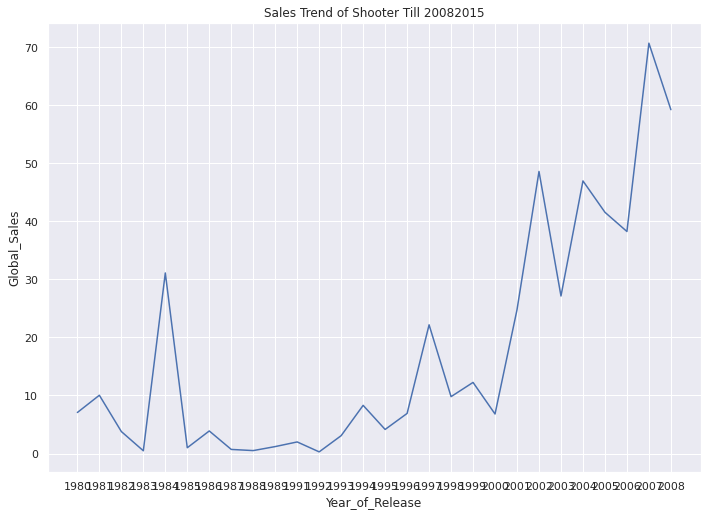

In [0]:
df12d=result12d.toPandas()
sns.lineplot(x='Year_of_Release', y='Global_Sales', data=df12d)
plt.title('Sales Trend of Shooter Till 20082015')
plt.xlabel('Year_of_Release')
plt.ylabel('Global_Sales')
plt.show()

13) Is there any correlation between critic scores and
globalsales?


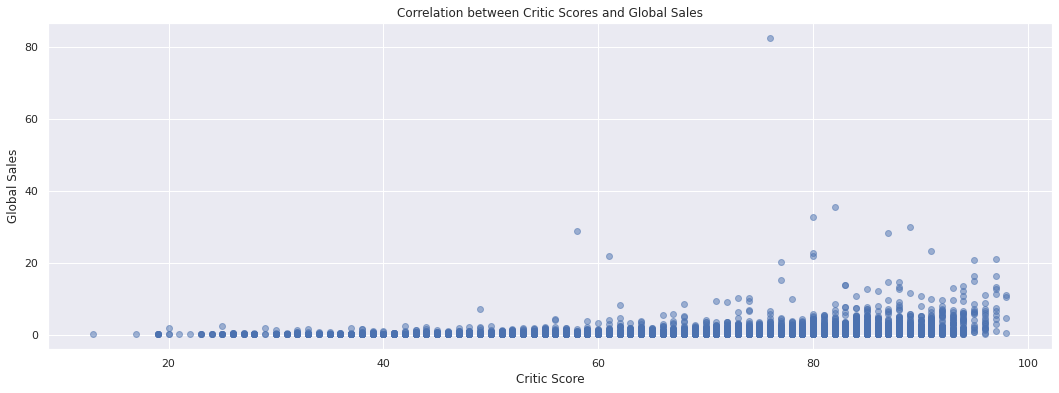

In [0]:
result_df = spark.sql("SELECT Critic_Score, Global_Sales FROM global_temp.sales")
df = result_df.toPandas()
plt.figure(figsize=(18, 6))
plt.scatter(df['Critic_Score'], df['Global_Sales'], alpha=0.5)
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.title('Correlation between Critic Scores and Global Sales')
plt.show()

### Conclusion

- The sale of Video Games peaked during the year 2006-2011. Most of the games were sold in North America followed by Europe and Japan
- Top 10 Games and Platforms on which they were realeased from the year 2008 to 2009 included games like __Mario Kart Wii__ in the __Wii__ platform.
- __Wii__ occupied a larger share of the pie during the period of 2008 to 2009 followed by __DS__, __Xbox 360__ and other genres of __Playstations__.
- However the top 10 platforms of all time is __Playstation 2__ followed by __Xbox 360__ and __Playstation 3__.
- The number of Games sold in North America was approximately 52% of the games sold all over the world
- Most of the Games sold in North America was of the Action, Sports and Shooter genre.
- The top publisher in Japan is Nintendo
- The top game played in Japan is Pokemon Red/ Pokemon Blue.
- The sale of Racing games have declined over the years from 2008 to 2015.
- The sale of Shooting games have rose over the years from 2008 to 2015